In [87]:
import pandas as pd
dataset_link='http://iali.in/datasets/Social_Network_Ads.csv'
dataset=pd.read_csv(dataset_link)
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [88]:
dataset_new=dataset.dropna(axis=0)
dataset_new.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [89]:
y=dataset_new.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [90]:
dataset_new.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
dict={'Male':0,'Female':1}
dataset_new['Gender']=dataset_new['Gender'].map(dict)

In [92]:
dataset_features=['Gender','Age','EstimatedSalary']
x=dataset_new[dataset_features]
x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [93]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
X = dataset_new.iloc[:, [2, 3]].values
y = dataset_new.iloc[:, 4].values

In [96]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
#using decison tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

In [98]:
y_prediction = clf.predict(x_test)
y_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_prediction,y_test)

0.85

In [100]:
from sklearn.metrics import classification_report
classes=['0','1']
classification_report(y_prediction,y_test,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89        53\n           1       0.78      0.78      0.78        27\n\n    accuracy                           0.85        80\n   macro avg       0.83      0.83      0.83        80\nweighted avg       0.85      0.85      0.85        80\n'

In [101]:
dataframe=pd.DataFrame({'actual':y_test, 'prediction':y_prediction})
dataframe.head(10)

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,1
7,0,0
8,0,0
9,0,1


In [102]:
dataframe.tail(10)

,actual,prediction
70,1,1
71,0,0
72,1,0
73,0,0
74,0,0
75,0,1
76,1,1
77,0,0
78,0,0
79,0,0


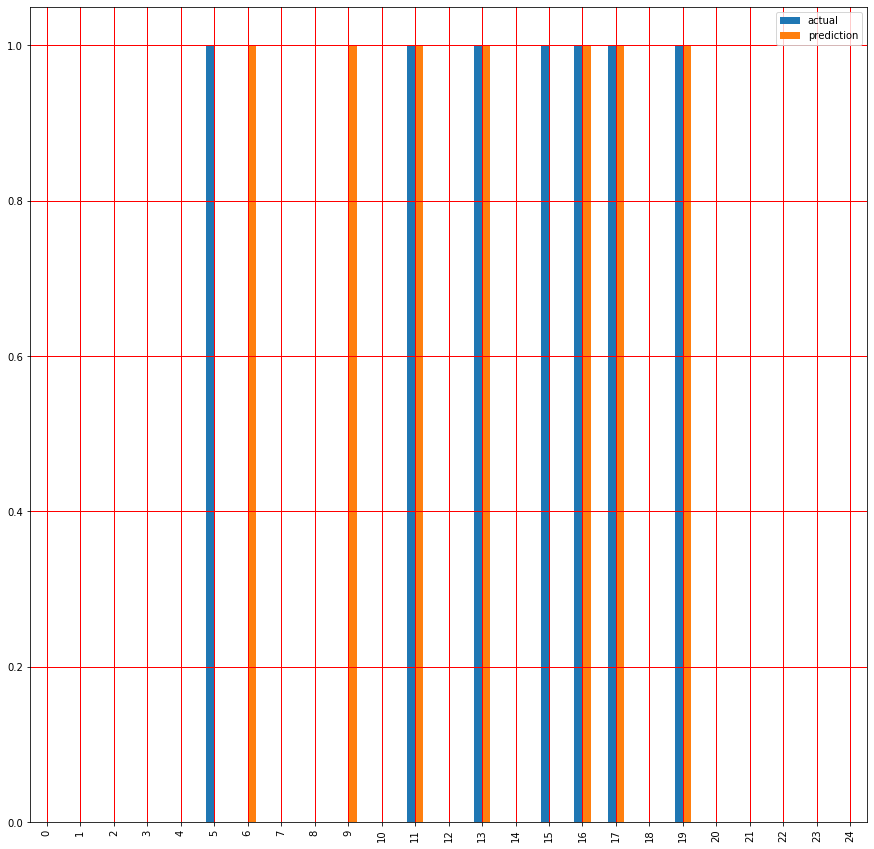

In [103]:
import matplotlib.pyplot as plt
c=dataframe.head(25)
c.plot(kind='bar', figsize=(15,15))
plt.grid(which='major',linestyle='-',linewidth='1',color="red")
plt.grid(which='minor',linestyle=':',linewidth='1',color="blue")
plt.show()